출처: 혼자 공부하는 머신러닝+딥러닝; 한빛미디어; 2020; 박해선 저

In [26]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-08-17 00:12:36--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-08-17 00:12:36--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 20.200.245.247
Connecting to github.com (github.com)|20.200.245.247|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-08-17 00:12:37--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... c

- PCA 클래스

In [27]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

In [28]:
fruits = np.load('./fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)
print(f"fruits.shape   : {fruits.shape}")
print(f"fruits_2d.shape: {fruits_2d.shape}")

fruits.shape   : (300, 100, 100)
fruits_2d.shape: (300, 10000)


In [29]:
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [30]:
# n_components=50 이기 때문에 50개의 주성분을 찾고, 2번째 차원은 원본 데이터 수와 동일
print(pca.components_.shape)

(50, 10000)


In [31]:
def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

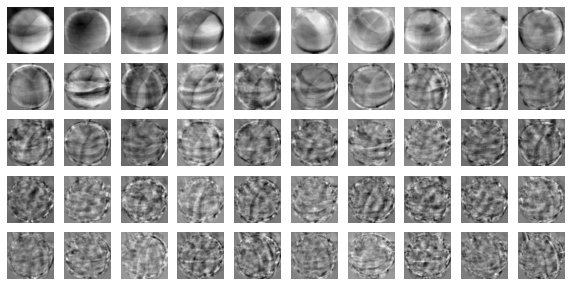

In [32]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [33]:
fruits_pca = pca.transform(fruits_2d)

print(f"fruits_2d.shape : {fruits_2d.shape}")
print(f"fruits_pca.shape: {fruits_pca.shape}")

fruits_2d.shape : (300, 10000)
fruits_pca.shape: (300, 50)


- 원본 데이터 재구성

In [34]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(f"fruits_inverse.shape: {fruits_inverse.shape}")

fruits_inverse.shape: (300, 10000)


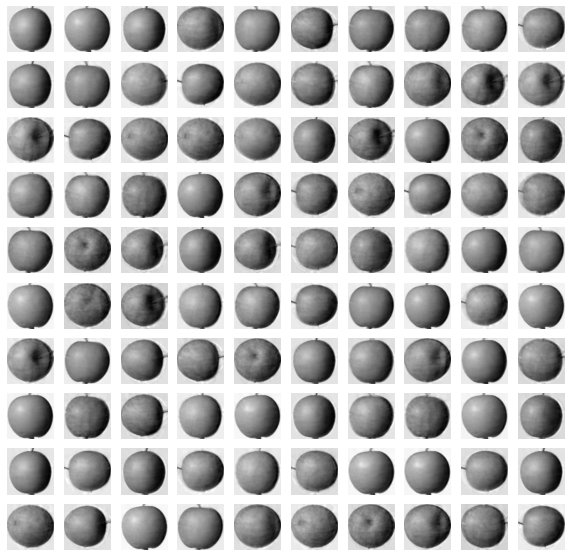

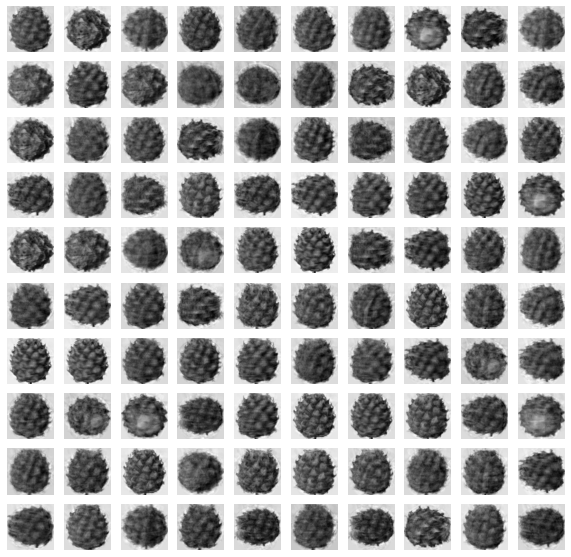

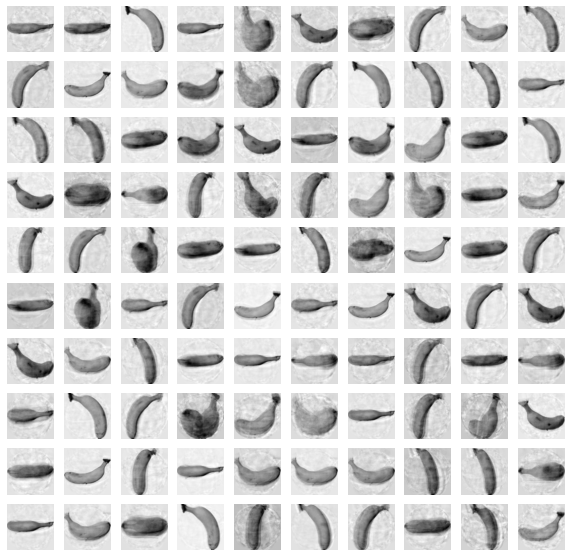

In [35]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

In [36]:
pca_10 = PCA(n_components=10)
pca_10.fit(fruits_2d)

fruits_pca_10 = pca_10.transform(fruits_2d)

print(f"fruits_2d.shape    : {fruits_2d.shape}")
print(f"fruits_pca_10.shape: {fruits_pca_10.shape}")

fruits_2d.shape    : (300, 10000)
fruits_pca_10.shape: (300, 10)


In [37]:
fruits_inverse_10 = pca_10.inverse_transform(fruits_pca_10)
print(f"fruits_inverse_10.shape: {fruits_inverse_10.shape}")

fruits_inverse_10.shape: (300, 10000)


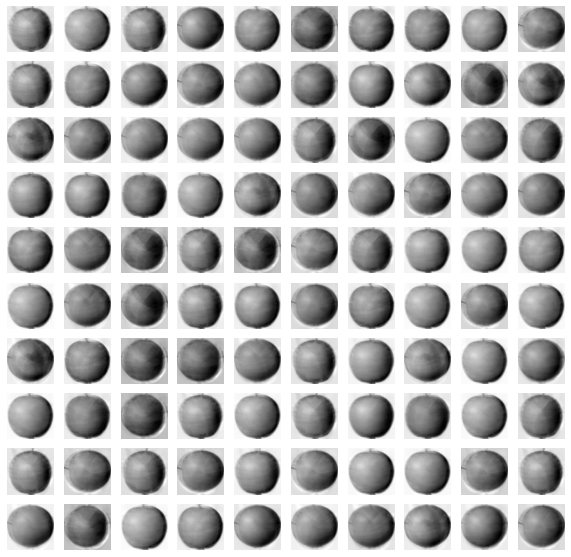

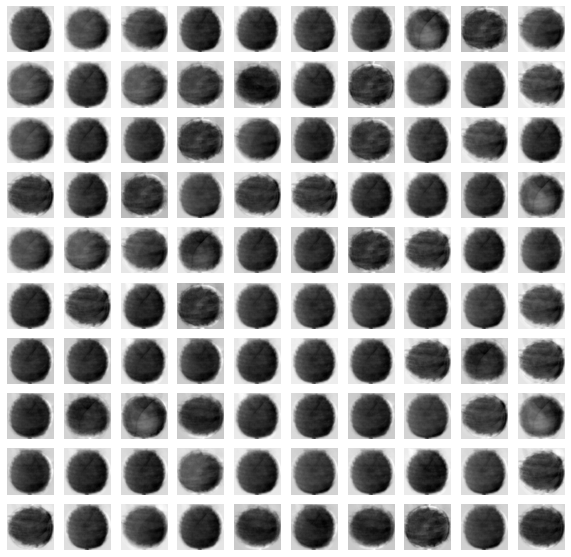

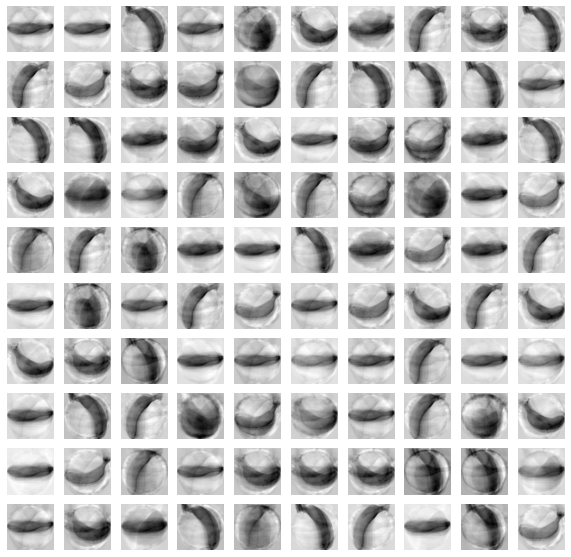

In [38]:
fruits_reconstruct_10 = fruits_inverse_10.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct_10[start:start+100])
    print("\n")

- 설명된 분산 (explained variance)

In [39]:
print(np.sum(pca.explained_variance_ratio_))

0.9215093828285155


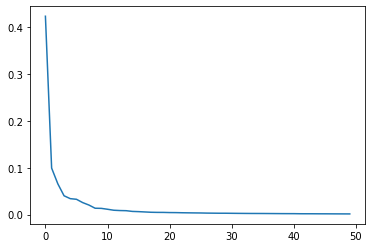

In [40]:
plt.plot(pca.explained_variance_ratio_)
plt.show()